# This notebook contains code I used to extract subsets of Food101 dataset

***During writing this code I followed the [instructions](https://github.com/mrdbourke/tensorflow-deep-learning/blob/main/extras/image_data_modification.ipynb) of ZTM course.***

All the directories with images are:

In [2]:
!ls /Users/alexeyks/coding/ml-course/food/food-101/images

apple_pie               eggs_benedict           onion_rings
baby_back_ribs          escargots               oysters
baklava                 falafel                 pad_thai
beef_carpaccio          filet_mignon            paella
beef_tartare            fish_and_chips          pancakes
beet_salad              foie_gras               panna_cotta
beignets                french_fries            peking_duck
bibimbap                french_onion_soup       pho
bread_pudding           french_toast            pizza
breakfast_burrito       fried_calamari          pork_chop
bruschetta              fried_rice              poutine
caesar_salad            frozen_yogurt           prime_rib
cannoli                 garlic_bread            pulled_pork_sandwich
caprese_salad           gnocchi                 ramen
carrot_cake             greek_salad             ravioli
ceviche                 grilled_cheese_sandwich red_velvet_cake
cheese_plate            grilled_salmon          risotto
cheesecake        

In [15]:
import json
from tqdm.notebook import tqdm
import random

# Getting the labels

In [9]:
# Get labels
def get_labels(label_path):
    """
    Accepts a label path (in the form of a JSON) and returns the file
    as a Python object.
    """
    with open(label_path) as f:
        return json.load(f)

train_labels = get_labels("/Users/alexeyks/coding/ml-course/food/food-101/meta/train.json")
test_labels = get_labels("/Users/alexeyks/coding/ml-course/food/food-101/meta/test.json")

In [5]:
print(len(train_labels["pizza"]))
print(len(test_labels["pizza"]))

750
250


# Create target class folders and move images there

In [4]:
import shutil
import os

def copy_images(parent_folder, new_subset, dataset, target_labels):
    """
    Copies `labels[target_labels]` images from `parent_folder` to
    `new_subset` (named after `dataset`) folder.
    
    Parameters
    --------
    parent_folder (str) - original folder path with all data
    new_subset (str) - name of parent folder to copy to
    dataset (str) - which dataset? (train or test)
    labels (list) - list of training or test labels
    target_labels (list) - list of target labels to copy e.g. ["steak", "pizza"]
    """
    # Get the appropriate labels
    print(f"\nUsing {dataset} labels...")
    labels = get_labels("/Users/alexeyks/coding/ml-course/food/food-101/meta/" + dataset + ".json")
    
    # Loop through target labels
    for i in target_labels:
        # Make target directory
        os.makedirs(parent_folder + "/" + new_subset + "/" + dataset + "/" + i, 
                    exist_ok=True)
        
        # Go through labels and get appropriate classes
        images_moved = [] # Keep track of images moved
        for j in labels[i]:
            # Create original image path and new path
            og_path = parent_folder + "/food-101/images/" + j + ".jpg"
            new_path = parent_folder + "/" + new_subset + "/" + dataset + "/" + j + ".jpg"
            
            # Copy images from old path to new path
            shutil.copy2(og_path, new_path)
            images_moved.append(new_path)
        print(f"Copied {len(images_moved)} images from {dataset} dataset {i} class...")

# Create function to get random sample of images



In [13]:
def get_percent_images(target_dir, new_dir, sample_amount=0.1, random_state=42):
    """
    Get sample_amount percentage of random images from target_dir and copy them to new_dir.
    
    Preserves subdirectory file names.
    
    Parameters
    --------
    target_dir (str) - file path of directory you want to extract images from
    new_dir (str) - new directory path you want to copy original images to
    sample_amount (float), default 0.1 - percentage of images to copy (e.g. 0.1 = 10%)
    random_state (int), default 42 - random seed value 
    """
    # Set random seed for reproducibility
    random.seed(random_state)
    
    # Get a list of dictionaries of image files in target_dir
    # e.g. [{"class_name":["2348348.jpg", "2829119.jpg"]}]
    images = [{dir_name: os.listdir(target_dir + dir_name)} for dir_name in os.listdir(target_dir) if not dir_name.startswith('.')]

    for i in images:
        for k, v in i.items():
            # How many images to sample?
            sample_number = round(int(len(v)*sample_amount))
            print(f"There are {len(v)} total images in '{target_dir+k}' so we're going to copy {sample_number} to the new directory.")
            print(f"Getting {sample_number} random images for {k}...")
            random_images = random.sample(v, sample_number)

            # Make new dir for each key
            new_target_dir = new_dir + k
            print(f"Making dir: {new_target_dir}")
            os.makedirs(new_target_dir, exist_ok=True)

            # Keep track of images moved
            images_moved = []

            # Create file paths for original images and new file target
            print(f"Copying images from: {target_dir}\n\t\t to: {new_target_dir}/\n")
            for file_name in tqdm(random_images):
                og_path = target_dir + k + "/" + file_name
                new_path = new_target_dir + "/" + file_name

                # Copy images from OG path to new path
                shutil.copy2(og_path, new_path)
                images_moved.append(new_path)

            # Make sure number of images moved is correct
            assert len(os.listdir(new_target_dir)) == sample_number
            assert len(images_moved) == sample_number

# Creating binary dataset

In [22]:
parent_folder = "/Users/alexeyks/coding/ml-course/food"
target_labels = ["hamburger", "pizza"]
new_subset = "hamburger_and_pizza"
datasets = ["train", "test"]

# Copy training/test images
for i in datasets:
    copy_images(parent_folder=parent_folder,
                new_subset=new_subset,
                dataset=i,
                #labels=labels,
                target_labels=target_labels)


Using train labels...
Copied 750 images from train dataset hamburger class...
Copied 750 images from train dataset pizza class...

Using test labels...
Copied 250 images from test dataset hamburger class...
Copied 250 images from test dataset pizza class...


In [24]:
print("Number of images in training set:", len(os.listdir("/Users/alexeyks/coding/ml-course/food/hamburger_and_piz!ls data/pizza_steakza/train/hamburger")))
print("Number of images in test set:", len(os.listdir("/Users/alexeyks/coding/ml-course/food/hamburger_and_pizza/test/hamburger")))

Number of images in training set: 750
Number of images in test set: 250


Make sure there are no overlaps in the training and test sets

In [28]:
train_files = set(os.listdir("/Users/alexeyks/coding/ml-course/food/hamburger_and_pizza/train/hamburger"))
test_files = set(os.listdir("/Users/alexeyks/coding/ml-course/food/hamburger_and_pizza/test/hamburger"))

# There should be no intersection of file names in training/test set
assert len(train_files.intersection(test_files)) == 0

## Making 10% of binary dataset

In [29]:
!ls /Users/alexeyks/coding/ml-course/food/hamburger_and_pizza

test  train


In [34]:
!ls /Users/alexeyks/coding/ml-course/food/hamburger_and_pizza/train

hamburger pizza


In [60]:
get_percent_images(target_dir="/Users/alexeyks/coding/ml-course/food/hamburger_and_pizza/train/",
                   new_dir="/Users/alexeyks/coding/ml-course/food/hamburger_and_pizza_10_percent/train/",
                   sample_amount=0.1,
                   random_state=42)

There are 750 total images in '/Users/alexeyks/coding/ml-course/food/hamburger_and_pizza/train/hamburger' so we're going to copy 75 to the new directory.
Getting 75 random images for hamburger...
Making dir: /Users/alexeyks/coding/ml-course/food/hamburger_and_pizza_10_percent/train/hamburger
Copying images from: /Users/alexeyks/coding/ml-course/food/hamburger_and_pizza/train/
		 to: /Users/alexeyks/coding/ml-course/food/hamburger_and_pizza_10_percent/train/hamburger/



100%|█████████████████████████████████████████| 75/75 [00:00<00:00, 2201.35it/s]


There are 750 total images in '/Users/alexeyks/coding/ml-course/food/hamburger_and_pizza/train/pizza' so we're going to copy 75 to the new directory.
Getting 75 random images for pizza...
Making dir: /Users/alexeyks/coding/ml-course/food/hamburger_and_pizza_10_percent/train/pizza
Copying images from: /Users/alexeyks/coding/ml-course/food/hamburger_and_pizza/train/
		 to: /Users/alexeyks/coding/ml-course/food/hamburger_and_pizza_10_percent/train/pizza/



100%|█████████████████████████████████████████| 75/75 [00:00<00:00, 2223.41it/s]


In [76]:
binary_test = "/Users/alexeyks/coding/ml-course/food/hamburger_and_pizza"
shutil.copytree(binary_test, "/Users/alexeyks/coding/ml-course/food/hamburger_and_pizza_10_percent/test/")

FileExistsError: [Errno 17] File exists: '/Users/alexeyks/coding/ml-course/food/hamburger_and_pizza_10_percent/test/'

In [81]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

In [77]:
def view_three_images(target_dir, target_class):
    """
    Randomly selects and displays 3 random images from `target_class` folder in `target_dir` folder.
    
    Requires target_dir to be in format:
        target_dir
                 |target_class_1
                 |target_class_2
                 |...
                 
    """
    target_path = target_dir+target_class
    file_names = os.listdir(target_path)
    target_images = random.sample(file_names, 3)
    
    # Plot images
    plt.figure(figsize=(15, 6))
    for i, img in enumerate(target_images):
        img_path = target_path + "/" + img
        plt.subplot(1, 3, i+1)
        plt.imshow(mpimg.imread(img_path))
        plt.title(target_class)
        plt.axis("off")

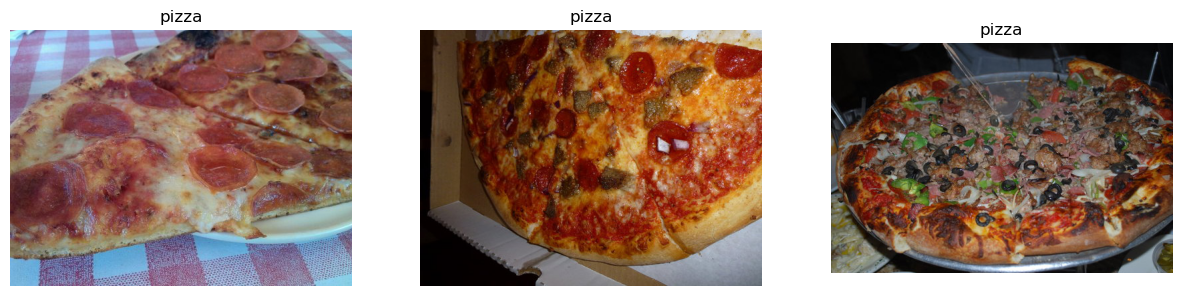

In [80]:
view_three_images(target_dir="/Users/alexeyks/coding/ml-course/food/food-101/images/", 
                  target_class="pizza")

# Creating a subset of 10 classes

In [83]:
# Get all classnames
classes = []
with open("/Users/alexeyks/coding/ml-course/food/food-101/meta/classes.txt") as f:
    for line in f.readlines():
        classes.append(line.split("\n")[0]) 

classes

['apple_pie',
 'baby_back_ribs',
 'baklava',
 'beef_carpaccio',
 'beef_tartare',
 'beet_salad',
 'beignets',
 'bibimbap',
 'bread_pudding',
 'breakfast_burrito',
 'bruschetta',
 'caesar_salad',
 'cannoli',
 'caprese_salad',
 'carrot_cake',
 'ceviche',
 'cheesecake',
 'cheese_plate',
 'chicken_curry',
 'chicken_quesadilla',
 'chicken_wings',
 'chocolate_cake',
 'chocolate_mousse',
 'churros',
 'clam_chowder',
 'club_sandwich',
 'crab_cakes',
 'creme_brulee',
 'croque_madame',
 'cup_cakes',
 'deviled_eggs',
 'donuts',
 'dumplings',
 'edamame',
 'eggs_benedict',
 'escargots',
 'falafel',
 'filet_mignon',
 'fish_and_chips',
 'foie_gras',
 'french_fries',
 'french_onion_soup',
 'french_toast',
 'fried_calamari',
 'fried_rice',
 'frozen_yogurt',
 'garlic_bread',
 'gnocchi',
 'greek_salad',
 'grilled_cheese_sandwich',
 'grilled_salmon',
 'guacamole',
 'gyoza',
 'hamburger',
 'hot_and_sour_soup',
 'hot_dog',
 'huevos_rancheros',
 'hummus',
 'ice_cream',
 'lasagna',
 'lobster_bisque',
 'lobster

In [84]:
fast_food = ["pizza", "chicken_wings", "sushi", "club_sandwich", "french_fries",
               "onion_rings", "hamburger", "hot_dog", "tacos", "donuts"]
len(fast_food)

10

In [92]:
parent_folder = "/Users/alexeyks/coding/ml-course/food"
new_subset = "fast_food_10_classes"
datasets = ["train", "test"]

# Copy training/test images
for i in datasets:
    copy_images(parent_folder=parent_folder,
                new_subset=new_subset,
                dataset=i,
                #labels=labels,
                target_labels=ten_classes)


Using train labels...
Copied 750 images from train dataset pizza class...
Copied 750 images from train dataset chicken_wings class...
Copied 750 images from train dataset sushi class...
Copied 750 images from train dataset club_sandwich class...
Copied 750 images from train dataset french_fries class...
Copied 750 images from train dataset onion_rings class...
Copied 750 images from train dataset hamburger class...
Copied 750 images from train dataset hot_dog class...
Copied 750 images from train dataset tacos class...
Copied 750 images from train dataset donuts class...

Using test labels...
Copied 250 images from test dataset pizza class...
Copied 250 images from test dataset chicken_wings class...
Copied 250 images from test dataset sushi class...
Copied 250 images from test dataset club_sandwich class...
Copied 250 images from test dataset french_fries class...
Copied 250 images from test dataset onion_rings class...
Copied 250 images from test dataset hamburger class...
Copied 25

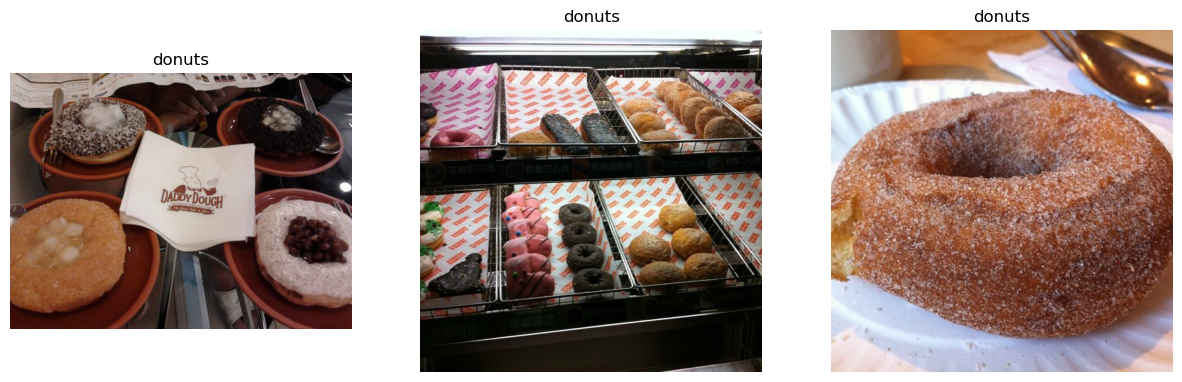

In [87]:
view_three_images(target_dir="/Users/alexeyks/coding/ml-course/food/food-101/images/", 
                  target_class="donuts")

In [94]:
# Make 10% dataset of 10_food_classes (of training data only)
get_percent_images(target_dir="/Users/alexeyks/coding/ml-course/food/fast_food_10_classes/train/",
                   new_dir="/Users/alexeyks/coding/ml-course/food/fast_food_10_classes_10_percent/train/",
                   sample_amount=0.1,
                   random_state=42)

There are 750 total images in '/Users/alexeyks/coding/ml-course/food/fast_food_10_classes/train/club_sandwich' so we're going to copy 75 to the new directory.
Getting 75 random images for club_sandwich...
Making dir: /Users/alexeyks/coding/ml-course/food/fast_food_10_classes_10_percent/train/club_sandwich
Copying images from: /Users/alexeyks/coding/ml-course/food/fast_food_10_classes/train/
		 to: /Users/alexeyks/coding/ml-course/food/fast_food_10_classes_10_percent/train/club_sandwich/



100%|█████████████████████████████████████████| 75/75 [00:00<00:00, 2341.63it/s]


There are 750 total images in '/Users/alexeyks/coding/ml-course/food/fast_food_10_classes/train/donuts' so we're going to copy 75 to the new directory.
Getting 75 random images for donuts...
Making dir: /Users/alexeyks/coding/ml-course/food/fast_food_10_classes_10_percent/train/donuts
Copying images from: /Users/alexeyks/coding/ml-course/food/fast_food_10_classes/train/
		 to: /Users/alexeyks/coding/ml-course/food/fast_food_10_classes_10_percent/train/donuts/



100%|█████████████████████████████████████████| 75/75 [00:00<00:00, 2655.70it/s]


There are 750 total images in '/Users/alexeyks/coding/ml-course/food/fast_food_10_classes/train/hot_dog' so we're going to copy 75 to the new directory.
Getting 75 random images for hot_dog...
Making dir: /Users/alexeyks/coding/ml-course/food/fast_food_10_classes_10_percent/train/hot_dog
Copying images from: /Users/alexeyks/coding/ml-course/food/fast_food_10_classes/train/
		 to: /Users/alexeyks/coding/ml-course/food/fast_food_10_classes_10_percent/train/hot_dog/



100%|█████████████████████████████████████████| 75/75 [00:00<00:00, 3074.25it/s]


There are 750 total images in '/Users/alexeyks/coding/ml-course/food/fast_food_10_classes/train/sushi' so we're going to copy 75 to the new directory.
Getting 75 random images for sushi...
Making dir: /Users/alexeyks/coding/ml-course/food/fast_food_10_classes_10_percent/train/sushi
Copying images from: /Users/alexeyks/coding/ml-course/food/fast_food_10_classes/train/
		 to: /Users/alexeyks/coding/ml-course/food/fast_food_10_classes_10_percent/train/sushi/



100%|█████████████████████████████████████████| 75/75 [00:00<00:00, 2642.71it/s]


There are 750 total images in '/Users/alexeyks/coding/ml-course/food/fast_food_10_classes/train/chicken_wings' so we're going to copy 75 to the new directory.
Getting 75 random images for chicken_wings...
Making dir: /Users/alexeyks/coding/ml-course/food/fast_food_10_classes_10_percent/train/chicken_wings
Copying images from: /Users/alexeyks/coding/ml-course/food/fast_food_10_classes/train/
		 to: /Users/alexeyks/coding/ml-course/food/fast_food_10_classes_10_percent/train/chicken_wings/



100%|█████████████████████████████████████████| 75/75 [00:00<00:00, 2774.70it/s]


There are 750 total images in '/Users/alexeyks/coding/ml-course/food/fast_food_10_classes/train/tacos' so we're going to copy 75 to the new directory.
Getting 75 random images for tacos...
Making dir: /Users/alexeyks/coding/ml-course/food/fast_food_10_classes_10_percent/train/tacos
Copying images from: /Users/alexeyks/coding/ml-course/food/fast_food_10_classes/train/
		 to: /Users/alexeyks/coding/ml-course/food/fast_food_10_classes_10_percent/train/tacos/



100%|█████████████████████████████████████████| 75/75 [00:00<00:00, 3052.62it/s]


There are 750 total images in '/Users/alexeyks/coding/ml-course/food/fast_food_10_classes/train/hamburger' so we're going to copy 75 to the new directory.
Getting 75 random images for hamburger...
Making dir: /Users/alexeyks/coding/ml-course/food/fast_food_10_classes_10_percent/train/hamburger
Copying images from: /Users/alexeyks/coding/ml-course/food/fast_food_10_classes/train/
		 to: /Users/alexeyks/coding/ml-course/food/fast_food_10_classes_10_percent/train/hamburger/



100%|█████████████████████████████████████████| 75/75 [00:00<00:00, 2612.80it/s]


There are 750 total images in '/Users/alexeyks/coding/ml-course/food/fast_food_10_classes/train/pizza' so we're going to copy 75 to the new directory.
Getting 75 random images for pizza...
Making dir: /Users/alexeyks/coding/ml-course/food/fast_food_10_classes_10_percent/train/pizza
Copying images from: /Users/alexeyks/coding/ml-course/food/fast_food_10_classes/train/
		 to: /Users/alexeyks/coding/ml-course/food/fast_food_10_classes_10_percent/train/pizza/



100%|█████████████████████████████████████████| 75/75 [00:00<00:00, 2843.57it/s]


There are 750 total images in '/Users/alexeyks/coding/ml-course/food/fast_food_10_classes/train/french_fries' so we're going to copy 75 to the new directory.
Getting 75 random images for french_fries...
Making dir: /Users/alexeyks/coding/ml-course/food/fast_food_10_classes_10_percent/train/french_fries
Copying images from: /Users/alexeyks/coding/ml-course/food/fast_food_10_classes/train/
		 to: /Users/alexeyks/coding/ml-course/food/fast_food_10_classes_10_percent/train/french_fries/



100%|█████████████████████████████████████████| 75/75 [00:00<00:00, 2921.72it/s]


There are 750 total images in '/Users/alexeyks/coding/ml-course/food/fast_food_10_classes/train/onion_rings' so we're going to copy 75 to the new directory.
Getting 75 random images for onion_rings...
Making dir: /Users/alexeyks/coding/ml-course/food/fast_food_10_classes_10_percent/train/onion_rings
Copying images from: /Users/alexeyks/coding/ml-course/food/fast_food_10_classes/train/
		 to: /Users/alexeyks/coding/ml-course/food/fast_food_10_classes_10_percent/train/onion_rings/



100%|█████████████████████████████████████████| 75/75 [00:00<00:00, 2660.73it/s]


In [95]:
ten_percent_test = "/Users/alexeyks/coding/ml-course/food/fast_food_10_classes/test/"
shutil.copytree(ten_percent_test, "/Users/alexeyks/coding/ml-course/food/fast_food_10_classes_10_percent/test/")

'/Users/alexeyks/coding/ml-course/food/fast_food_10_classes_10_percent/test/'

# Splitting the whole dataset

In [96]:
parent_folder = "/Users/alexeyks/coding/ml-course/food"
new_subset = "all_food_classes"
datasets = ["train", "test"]

# Copy training/test images
for i in datasets:
    copy_images(parent_folder=parent_folder,
                new_subset=new_subset,
                dataset=i,
                target_labels=classes)


Using train labels...
Copied 750 images from train dataset apple_pie class...
Copied 750 images from train dataset baby_back_ribs class...
Copied 750 images from train dataset baklava class...
Copied 750 images from train dataset beef_carpaccio class...
Copied 750 images from train dataset beef_tartare class...
Copied 750 images from train dataset beet_salad class...
Copied 750 images from train dataset beignets class...
Copied 750 images from train dataset bibimbap class...
Copied 750 images from train dataset bread_pudding class...
Copied 750 images from train dataset breakfast_burrito class...
Copied 750 images from train dataset bruschetta class...
Copied 750 images from train dataset caesar_salad class...
Copied 750 images from train dataset cannoli class...
Copied 750 images from train dataset caprese_salad class...
Copied 750 images from train dataset carrot_cake class...
Copied 750 images from train dataset ceviche class...
Copied 750 images from train dataset cheesecake class

Copied 250 images from test dataset french_toast class...
Copied 250 images from test dataset fried_calamari class...
Copied 250 images from test dataset fried_rice class...
Copied 250 images from test dataset frozen_yogurt class...
Copied 250 images from test dataset garlic_bread class...
Copied 250 images from test dataset gnocchi class...
Copied 250 images from test dataset greek_salad class...
Copied 250 images from test dataset grilled_cheese_sandwich class...
Copied 250 images from test dataset grilled_salmon class...
Copied 250 images from test dataset guacamole class...
Copied 250 images from test dataset gyoza class...
Copied 250 images from test dataset hamburger class...
Copied 250 images from test dataset hot_and_sour_soup class...
Copied 250 images from test dataset hot_dog class...
Copied 250 images from test dataset huevos_rancheros class...
Copied 250 images from test dataset hummus class...
Copied 250 images from test dataset ice_cream class...
Copied 250 images from t

In [97]:
ten_percent_test = "/Users/alexeyks/coding/ml-course/food/all_food_classes/test/"
shutil.copytree(ten_percent_test, "/Users/alexeyks/coding/ml-course/food/all_food_classes_10_percent/test/")

'/Users/alexeyks/coding/ml-course/food/all_food_classes_10_percent/test/'

# Making dataset for object detection (5 classes)

**For object detection I will work with: schicken wings, sushi, french fries, hamburger, donuts**

In [2]:
food_odj_5 = ["chicken_wings", "sushi", "french_fries", "hamburger", "donuts"]
len(food_odj_5)

5

In [11]:
parent_folder = "/Users/alexeyks/coding/ml-course/food"
new_subset = "fast_food_5_classes_detection"
datasets = ["train", "test"]

# Copy training/test images
for i in datasets:
    copy_images(parent_folder=parent_folder,
                new_subset=new_subset,
                dataset=i,
                #labels=labels,
                target_labels=food_odj_5)


Using train labels...
Copied 750 images from train dataset chicken_wings class...
Copied 750 images from train dataset sushi class...
Copied 750 images from train dataset french_fries class...
Copied 750 images from train dataset hamburger class...
Copied 750 images from train dataset donuts class...

Using test labels...
Copied 250 images from test dataset chicken_wings class...
Copied 250 images from test dataset sushi class...
Copied 250 images from test dataset french_fries class...
Copied 250 images from test dataset hamburger class...
Copied 250 images from test dataset donuts class...


# Make 10% dataset of fast_food_5_classes_detection

In [16]:
# Make 10% dataset of fast_food_5_classes_detection (of training data only)
get_percent_images(target_dir="/Users/alexeyks/coding/ml-course/food/fast_food_5_classes_detection/train/",
                   new_dir="/Users/alexeyks/coding/ml-course/food/fast_food_5_classes_detection_10_percent/train/",
                   sample_amount=0.1,
                   random_state=42)

There are 750 total images in '/Users/alexeyks/coding/ml-course/food/fast_food_5_classes_detection/train/donuts' so we're going to copy 75 to the new directory.
Getting 75 random images for donuts...
Making dir: /Users/alexeyks/coding/ml-course/food/fast_food_5_classes_detection_10_percent/train/donuts
Copying images from: /Users/alexeyks/coding/ml-course/food/fast_food_5_classes_detection/train/
		 to: /Users/alexeyks/coding/ml-course/food/fast_food_5_classes_detection_10_percent/train/donuts/



  0%|          | 0/75 [00:00<?, ?it/s]

There are 750 total images in '/Users/alexeyks/coding/ml-course/food/fast_food_5_classes_detection/train/sushi' so we're going to copy 75 to the new directory.
Getting 75 random images for sushi...
Making dir: /Users/alexeyks/coding/ml-course/food/fast_food_5_classes_detection_10_percent/train/sushi
Copying images from: /Users/alexeyks/coding/ml-course/food/fast_food_5_classes_detection/train/
		 to: /Users/alexeyks/coding/ml-course/food/fast_food_5_classes_detection_10_percent/train/sushi/



  0%|          | 0/75 [00:00<?, ?it/s]

There are 750 total images in '/Users/alexeyks/coding/ml-course/food/fast_food_5_classes_detection/train/chicken_wings' so we're going to copy 75 to the new directory.
Getting 75 random images for chicken_wings...
Making dir: /Users/alexeyks/coding/ml-course/food/fast_food_5_classes_detection_10_percent/train/chicken_wings
Copying images from: /Users/alexeyks/coding/ml-course/food/fast_food_5_classes_detection/train/
		 to: /Users/alexeyks/coding/ml-course/food/fast_food_5_classes_detection_10_percent/train/chicken_wings/



  0%|          | 0/75 [00:00<?, ?it/s]

There are 750 total images in '/Users/alexeyks/coding/ml-course/food/fast_food_5_classes_detection/train/hamburger' so we're going to copy 75 to the new directory.
Getting 75 random images for hamburger...
Making dir: /Users/alexeyks/coding/ml-course/food/fast_food_5_classes_detection_10_percent/train/hamburger
Copying images from: /Users/alexeyks/coding/ml-course/food/fast_food_5_classes_detection/train/
		 to: /Users/alexeyks/coding/ml-course/food/fast_food_5_classes_detection_10_percent/train/hamburger/



  0%|          | 0/75 [00:00<?, ?it/s]

There are 750 total images in '/Users/alexeyks/coding/ml-course/food/fast_food_5_classes_detection/train/french_fries' so we're going to copy 75 to the new directory.
Getting 75 random images for french_fries...
Making dir: /Users/alexeyks/coding/ml-course/food/fast_food_5_classes_detection_10_percent/train/french_fries
Copying images from: /Users/alexeyks/coding/ml-course/food/fast_food_5_classes_detection/train/
		 to: /Users/alexeyks/coding/ml-course/food/fast_food_5_classes_detection_10_percent/train/french_fries/



  0%|          | 0/75 [00:00<?, ?it/s]